Author: Nyasha Chigwaja

### This notebook reads in university faculty handbooks in PDF format and creates a plot of the occurence of words related to the skills identified by the World  Economic Forum as essential for the 4th Industrial Revolution.

### Steps:

1. Imports PDF
2. Creates an array of the WEF skills to search the handbook for
3. Defines a function that counts the number of instances of a word. (function's arguments are the word, the handbook, number of pages to scan)
4. Defines a function that loops through all words in the WEF skills array, and pass them through the function in 3
5. Defines function that takes the results from 4 and creates a plot of the frenquency of each of the words that occured at least once

### Import packages for reading PDFs, and creating plots

In [4]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [314]:
import PyPDF2 as ppdf
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

#The PDF reader throws a warning about the document indexing, filer out warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Open file and save to a variable

The first file is the University of Cape Town Commerce faculty handbook

In [319]:
PDFfile = open('/Users/nyasha.chigwaja/Documents/uct_commerce_faculty.pdf',"rb")

In [320]:
uct_commerce = ppdf.PdfFileReader(PDFfile)

### Get document information

In [321]:
print(uct_commerce.getDocumentInfo())

{'/Author': '01357572', '/CreationDate': "D:20191224075746+02'00'", '/Creator': 'PScript5.dll Version 5.2.2', '/ModDate': "D:20191224090614+02'00'", '/Producer': 'Acrobat Distiller 19.0 (Windows)', '/Title': 'Microsoft Word - 2020_COM_UG_handbook 2nd build'}


### Extract first page of PDF and display

In [326]:
first_page = uct_commerce.getPage(1)

In [327]:
print(first_page.extractText())

The University has made every effort to ensure the accuracy of the information in its handbooks. However, we reserve the right at any time, if cir
cumstances dictate (for example, if there are not 
sufficient students registered), to (i)make alterations or change
s to any of the published details of the opportunities on offer; or (ii)add to or withdraw any 
of the opportunities on offer. Our students are given every assurance that changes to opportunities will only be made undercompelling circumstances and students will be fully informed as soon as possible.


### Create an array of words to check for according to the WEF report - Top 10 skills

In [328]:
#To do: Check if there is a NLP function that will find words 
#which are similar to these and add them to the dictionary
WEF_identified_skills = ['complex',
                         'problem',
                         'solving',
                         'complex-problem solving',
                         'cognitive flexibility',
                         'critical',
                         'thinking',
                         'critical thinking',
                         'creativity',
                         'people',
                         'management',
                         'service orientation',
                         'judgement and decision making',
                         'coordinating with others',
                         'service orientation',
                         'coordinating',
                         'cooridination',
                         'negotiation',
                         'emotional',
                         'intelligence',
                         'judgement',
                         'decision',
                         'decision making',
                         'cognitive',
                         'flexibility',
                         'problem-solving',
                        'people management']

In [333]:
def count_occurence(number_of_pages,word_to_scan,pdf_to_scan):
    """ This function scans all pages of a given PDF for the occurence of a word.
    Each time the word is encountered the counter is incremented by 1, the final count is returned"""
    i = 0
    word_count = 0
    while i < number_of_pages:
        pageinfo = pdf_to_scan.getPage(i)
        obj = pageinfo.extractText()
        i = i +1
        word_count_this_page = len(re.findall(word_to_scan,obj,re.MULTILINE))
        word_count = word_count + word_count_this_page
        #print(word_count)
    return word_count

### Test the function with a common word

In [342]:
number_of_pages = uct_commerce.getNumPages()
print('The word the occurs',
      count_occurence(number_of_pages,"the",uct_commerce),
      'times in the commerce faculty handbook')

The word the occurs 4592 times in the commerce faculty handbook


### Now count occurence of each word in the entire PDF

In [343]:
word_counts = []
for i in WEF_identified_skills:
    """For every word in the WEF skills list loop through each page of the document and count its occurence,
    append the final word count for each word in an array"""
    count_is = count_occurence(number_of_pages,
                               i,
                               uct_commerce)
    word_counts.append(count_is)
    #print(count_is)

In [ ]:
### Plot the results

In [347]:
def plot_frequency():
    df = pd.DataFrame({'x':WEF_identified_skills,'y':word_counts})
    df_trimmed = df[df.y > 0]
    df_trimmed.sort_values(by='y')
    plt.scatter(x=df_trimmed.x,y=df_trimmed.y)
    plt.tick_params(axis="x", labelsize=10)
    plt.xticks(rotation=45, ha="right")
    plt.title('Count of the number of instances of WEF skills in faculty handbook')
    plt.show()

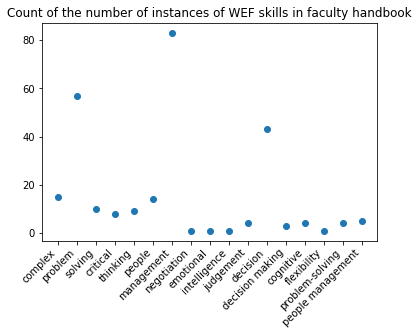

In [348]:
plot_frequency()

### Engineering faculty

In [349]:
PDFfile2 = open('/Users/nyasha.chigwaja/Documents/uct_engineering_faculty.pdf',"rb")

In [350]:
uct_engineering = ppdf.PdfFileReader(PDFfile2)

In [351]:
print(uct_engineering.getDocumentInfo())

{'/Author': '01416102', '/CreationDate': "D:20191125191528+02'00'", '/Creator': 'PScript5.dll Version 5.2.2', '/ModDate': "D:20191217103846+02'00'", '/Producer': 'Acrobat Distiller 15.0 (Windows)', '/Title': 'Microsoft Word - 2020_EBE_PG_handbook_second draft_Final working copy'}


In [352]:
# get the number of pages in the PDF
number_of_pages = uct_engineering.getNumPages()
print('The number of pages in this PDF is:',number_of_pages)

The number of pages in this PDF is: 265


In [353]:
word_counts = []
for i in WEF_identified_skills:
    count_is = count_occurence(number_of_pages,
                               i,
                               uct_engineering)
    word_counts.append(count_is)
    #print(count_is)

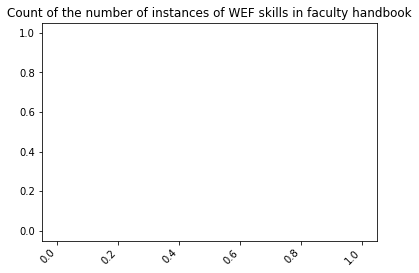

In [354]:
plot_frequency()

### Health Sciences faculty

#### Import the pdf

In [355]:
PDFfile3 = open('/Users/nyasha.chigwaja/Documents/uct_healthsciences_faculty.pdf',"rb")

In [356]:
uct_health = ppdf.PdfFileReader(PDFfile3)

#### Get document information

In [357]:
print(uct_health.getDocumentInfo())

{'/Author': '01447290', '/CreationDate': "D:20191121132635+02'00'", '/Creator': 'PScript5.dll Version 5.2.2', '/ModDate': "D:20191128121300+02'00'", '/Producer': 'Acrobat Distiller 15.0 (Windows)', '/Title': 'Microsoft Word - 2020_FHS_PG_handbook FINAL 21112019.xml'}


#### Print first page

In [358]:
first_page = uct_health.getPage(4)

In [359]:
print(first_page.extractText())

 Clinical Pharmacology ........................................................................................................... 10 African Emergency Care ......................................................................................................... 10 Clinical Emergency Care ........................................................................................................ 1 Disaster Medicine ................................................................................................................... 1Patient Safety and Clinical Decision-making (A) ................................................................... 1Patient Safety and Clinical Decision-making (B) ................................................................... 1 Health Innovation .................................................................................................................... 11 Intellectual Disability .......................................................................

#### Retrieve word count from WEF skills array

In [360]:
# get the number of pages in the PDF
number_of_pages = uct_health.getNumPages()
print('The number of pages in this PDF is:',number_of_pages)

The number of pages in this PDF is: 552


In [361]:
word_counts = []
for i in WEF_identified_skills:
    count_is = count_occurence(number_of_pages,
                               i,
                               uct_health)
    word_counts.append(count_is)
    #print(count_is)

#### Plot the frequencies

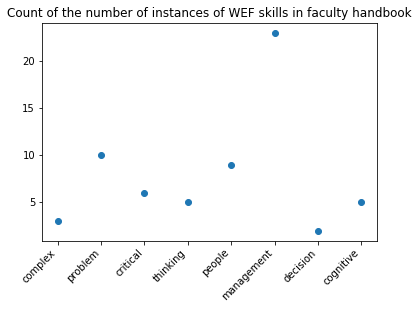

In [362]:
plot_frequency()

### Law faculty

In [285]:
PDFfile4 = open('/Users/nyasha.chigwaja/Documents/uct_law_faculty.pdf',"rb")

In [286]:
uct_law = ppdf.PdfFileReader(PDFfile4)

In [287]:
print(uct_law.getDocumentInfo())

{'/Author': '01420756', '/CreationDate': "D:20191121162937+02'00'", '/Creator': 'PScript5.dll Version 5.2.2', '/ModDate': "D:20191204120032+02'00'", '/Producer': 'Acrobat Distiller 10.1.14 (Windows)', '/Title': 'Microsoft Word - 2020_LAW_handbook_final'}


In [288]:
# get the number of pages in the PDF
number_of_pages = uct_law.getNumPages()
print('The number of pages in this PDF is:',number_of_pages)

The number of pages in this PDF is: 206


In [284]:
word_counts = []
for i in WEF_identified_skills:
    count_is = count_occurence(number_of_pages,
                               i,
                               uct_law)
    word_counts.append(count_is)
    #print(count_is)

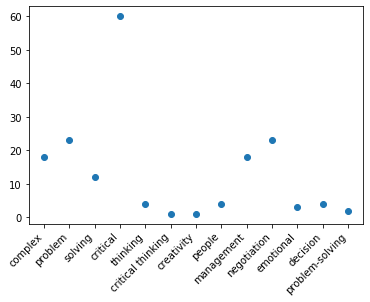

In [289]:
plot_frequency()

### Humanities faculty

In [363]:
PDFfile5 = open('/Users/nyasha.chigwaja/Documents/uct_humanities_handbook.pdf',"rb")

In [364]:
uct_humanities = ppdf.PdfFileReader(PDFfile5)

In [365]:
print(uct_humanities.getDocumentInfo())

{'/Author': '01416102', '/CreationDate': "D:20191203160955+02'00'", '/Creator': 'PScript5.dll Version 5.2.2', '/ModDate': "D:20191217114952+02'00'", '/Producer': 'Acrobat Distiller 19.0 (Windows)', '/Title': 'Microsoft Word - 2020_HUM_PG_handbook_second draft_Final working copy'}


In [366]:
# get the number of pages in the PDF
number_of_pages = uct_humanities.getNumPages()
print('The number of pages in this PDF is:',number_of_pages)

The number of pages in this PDF is: 469


In [ ]:
word_counts = []
for i in WEF_identified_skills:
    count_is = count_occurence(number_of_pages,
                               i,
                               uct_humanities)
    word_counts.append(count_is)
    #print(count_is)

In [ ]:
plot_frequency()